# <p style="padding:10px;background-color:#0f4c8c;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">"Meta-Learning for Autonomous Machine Learning Project"</p>

### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">First Week Objective: Building an AutoML System</p>
- ## **`Task 1:` Implement an AutoML framework using TPOT or H2O.ai. Select the best models and hyperparameters for a given dataset.**

## **`Set-Up`**

In [26]:
# Checking for available GPUs using "nvidia-smi". 
#This will increase the performance as H2O can leverage GPUs for faster model training.
!nvidia-smi  

Sun Oct 20 14:40:55 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 462.30       Driver Version: 462.30       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 1650   WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   51C    P8     6W /  N/A |    134MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [27]:
# H2O is build upon java. So we need java to install and implement H2O module in Jupyter notebook
!java -version 

java version "23.0.1" 2024-10-15
Java(TM) SE Runtime Environment (build 23.0.1+11-39)
Java HotSpot(TM) 64-Bit Server VM (build 23.0.1+11-39, mixed mode, sharing)


In [28]:
# It will install the h2o module. --> gives error if you local machine doesn't have java jdk in it
# !pip install h2o   #--> Uncomment it to install h2o module

In [29]:
import h2o  # Importing h2o module
h2o.init()  # initializing H2O --> it will start a local h2o server which is the core of h20 automl framework

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 mins 16 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,1 month and 21 days
H2O_cluster_name:,H2O_from_python_uppada_satwik_4p0hdq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.903 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


## **`Importing Data`**

In [30]:
from h2o.automl import H2OAutoML 
churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


## **`Data Description`**

In [31]:
churn_df.describe()

Rows:7043
Cols:21

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059919,2283.3004408418656,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.55948102309446,,,,,,,,,,,,,30.090047097678493,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## **`Data Preparation`**

In [32]:

churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])
     

In [33]:

churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.7,5036.3,Yes
3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


## **`Defining Features and Target`**

In [34]:
y = "Churn"
x = churn_df.columns
x.remove(y)
x.remove("customerID")
     

## **`AutoML Workflow`**

### `1. Creating an AutoML Object`

In [35]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

'''
max_models: Limits the number of models to be built.
seed: Sets a random seed for reproducibility.
exclude_algos: Excludes certain algorithms (StackedEnsemble, DeepLearning) from the AutoML process.
verbosity: Controls the level of logging information.
nfolds: Disables cross-validation

'''


'\nmax_models: Limits the number of models to be built.\nseed: Sets a random seed for reproducibility.\nexclude_algos: Excludes certain algorithms (StackedEnsemble, DeepLearning) from the AutoML process.\nverbosity: Controls the level of logging information.\nnfolds: Disables cross-validation\n\n'

### `2. Training the AutoML Model`

In [36]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)


AutoML progress: |█
14:41:44.367: Project: AutoML_2_20241020_144144
14:41:44.367: Cross-validation disabled by user: no fold column nor nfolds > 1.
14:41:44.367: Setting stopping tolerance adaptively based on the training frame: 0.014204774743178402
14:41:44.367: Build control seed: 10
14:41:44.367: training frame: Frame key: AutoML_2_20241020_144144_training_py_85_sid_b362    cols: 21    rows: 4956  chunks: 32    size: 568465  checksum: -4608055138204770807
14:41:44.367: validation frame: Frame key: py_87_sid_b362    cols: 21    rows: 1057  chunks: 32    size: 440334  checksum: -497593657592074911
14:41:44.367: leaderboard frame: Frame key: py_87_sid_b362    cols: 21    rows: 1057  chunks: 32    size: 440334  checksum: -497593657592074911
14:41:44.367: blending frame: NULL
14:41:44.367: response column: Churn
14:41:44.367: fold column: null
14:41:44.367: weights column: null
14:41:44.367: AutoML: XGBoost is not available; skipping it.
14:41:44.367: Loading execution steps: [{XGBoost :

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_2_20241020_144144_model_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    60                 60                          9427                   3            3            3             7             8             7.86667

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.1269429074118101
RMSE: 0.35629048178671585
LogLoss: 0.39454429591886125
Mean Per-Class Error: 0.22084075216325796
AUC: 0.8628913663716449
AUCPR: 0.6912903872785476
Gini: 0.7257827327432897

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3120979893231964
       No    Yes    Error    Rate
-----  ----  -----  -------  ---------------
No     2929  734    0.2004   (734.0/3663.0)
Yes    312   981    0.2413   (312.0/1293.0)
Total  3241  1715   0.2111   (1046.0/4956.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.312098     0.652261  220
max f2                       0.216784     0.755783  269
max f0point5                 0.498858     0.659832  140
max accuracy                 0.498858     0.819411  140
max precision                0.900424     1         0
max recall                   0.0210277    1         394
max specificity              0.900424     1         0
max absolute_mcc             0.381912     0.516646  189
max min_per_class_accuracy   0.288762     0.77887   231
max mean_per_class_accuracy  0.260636     0.784888  245
max tns                      0.900424     3663      0
max fns                      0.900424     1291      0
max fps                      0.0158783    3663      399
max tps                      0.0210277    1293      394
max tnr                      0.900424     1         0
max fnr                      0.900424     0.998453  0
max fpr                      0.0158783    1         399
max tpr                      0.0210277    1         394

Gains/Lift Table: Avg response rate: 26.09 %, avg score: 26.19 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100888                   0.834906           3.29633    3.29633            0.86             0.854879   0.86                        0.854879            0.033256        0.033256                   229.633   229.633            0.031345
2        0.0201776                   0.803646           3.52631    3.41132            0.92             0.819755   0.89                        0.837317            0.0355762       0.0688322                  252.631   241.132            0.0658292
3        0.0300646                   0.779661           3.75472    3.52425            0.979592         0.791375   0.919463                    0.822209            0.037123        0.105955                   275.472   252.425            0.102679
4        0.0401533                   0.753372           3.14302    3.42846            0.82             0.766865   0.894472                    0.808303            0.0317092       0.137664                   214.302   242.846            0.131931
5        0.0500404                   0.730364           3.36361    3.41565            0.877551         0.743068   0.89112

In [37]:
!nvidia-smi

Sun Oct 20 14:42:41 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 462.30       Driver Version: 462.30       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 1650   WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   53C    P8     6W /  N/A |    134MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### `Leaderboard`

In [38]:

lb = aml.leaderboard


In [39]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid_1_AutoML_2_20241020_144144_model_1,0.859396,0.404269,0.687866,0.211362,0.36208,0.131102
GBM_1_AutoML_2_20241020_144144,0.858058,0.403476,0.696437,0.238266,0.361707,0.130832
GLM_1_AutoML_2_20241020_144144,0.85353,0.412537,0.679251,0.227801,0.365541,0.133621
GBM_5_AutoML_2_20241020_144144,0.849204,0.412971,0.689453,0.240041,0.365894,0.133878
XRT_1_AutoML_2_20241020_144144,0.847415,0.420343,0.663944,0.245202,0.367778,0.13526
GBM_2_AutoML_2_20241020_144144,0.842444,0.422443,0.665464,0.242127,0.370986,0.137631
GBM_3_AutoML_2_20241020_144144,0.840818,0.424919,0.666061,0.23003,0.371793,0.13823
GBM_4_AutoML_2_20241020_144144,0.839286,0.432605,0.657552,0.235302,0.374692,0.140394
DRF_1_AutoML_2_20241020_144144,0.83905,0.48899,0.657684,0.240717,0.3732,0.139278
GBM_grid_1_AutoML_2_20241020_144144_model_2,0.831107,0.451275,0.667402,0.251941,0.380178,0.144535


In [40]:
h2o.display.toggle_user_tips()
aml.leader

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_2_20241020_144144_model_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    60                 60                          9427                   3            3            3             7             8             7.86667

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.1269429074118101
RMSE: 0.35629048178671585
LogLoss: 0.39454429591886125
Mean Per-Class Error: 0.22084075216325796
AUC: 0.8628913663716449
AUCPR: 0.6912903872785476
Gini: 0.7257827327432897

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3120979893231964
       No    Yes    Error    Rate
-----  ----  -----  -------  ---------------
No     2929  734    0.2004   (734.0/3663.0)
Yes    312   981    0.2413   (312.0/1293.0)
Total  3241  1715   0.2111   (1046.0/4956.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.312098     0.652261  220
max f2                       0.216784     0.755783  269
max f0point5                 0.498858     0.659832  140
max accuracy                 0.498858     0.819411  140
max precision                0.900424     1         0
max recall                   0.0210277    1         394
max specificity              0.900424     1         0
max absolute_mcc             0.381912     0.516646  189
max min_per_class_accuracy   0.288762     0.77887   231
max mean_per_class_accuracy  0.260636     0.784888  245
max tns                      0.900424     3663      0
max fns                      0.900424     1291      0
max fps                      0.0158783    3663      399
max tps                      0.0210277    1293      394
max tnr                      0.900424     1         0
max fnr                      0.900424     0.998453  0
max fpr                      0.0158783    1         399
max tpr                      0.0210277    1         394

Gains/Lift Table: Avg response rate: 26.09 %, avg score: 26.19 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100888                   0.834906           3.29633    3.29633            0.86             0.854879   0.86                        0.854879            0.033256        0.033256                   229.633   229.633            0.031345
2        0.0201776                   0.803646           3.52631    3.41132            0.92             0.819755   0.89                        0.837317            0.0355762       0.0688322                  252.631   241.132            0.0658292
3        0.0300646                   0.779661           3.75472    3.52425            0.979592         0.791375   0.919463                    0.822209            0.037123        0.105955                   275.472   252.425            0.102679
4        0.0401533                   0.753372           3.14302    3.42846            0.82             0.766865   0.894472                    0.808303            0.0317092       0.137664                   214.302   242.846            0.131931
5        0.0500404                   0.730364           3.36361    3.41565            0.877551         0.743068   0.89112

> Gradient Boosting Machine is the best performing model.

In [41]:
churn_pred=aml.leader.predict(churn_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [42]:
aml.leader.model_performance(churn_test)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.1378924667826633
RMSE: 0.37133874936863687
LogLoss: 0.4248053951461889
Mean Per-Class Error: 0.23331780055917986
AUC: 0.8476840633737185
AUCPR: 0.6803328670165307
Gini: 0.695368126747437

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.385380728899048
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     632   108    0.1459   (108.0/740.0)
Yes    93    197    0.3207   (93.0/290.0)
Total  725   305    0.1951   (201.0/1030.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.385381     0.662185  170
max f2                       0.199027     0.762359  265
max f0point5                 0.476467     0.666667  131
max accuracy                 0.476467     0.808738  131
max precision                0.883392     1         0
max recall                   0.0231139    1         390
max specificity              0.883392     1         0
max absolute_mcc             0.385381     0.525436  170
max min_per_class_accuracy   0.30007      0.768919  212
max mean_per_class_accuracy  0.256997     0.771598  235
max tns                      0.883392     740       0
max fns                      0.883392     289       0
max fps                      0.0161357    740       399
max tps                      0.0231139    290       390
max tnr                      0.883392     1         0
max fnr                      0.883392     0.996552  0
max fpr                      0.0161357    1         399
max tpr                      0.0231139    1         390

Gains/Lift Table: Avg response rate: 28.16 %, avg score: 27.07 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0106796                   0.819781           3.55172    3.55172            1                0.834013   1                           0.834013            0.037931        0.037931                   255.172   255.172            0.037931
2        0.0203883                   0.79085            2.48621    3.04433            0.7              0.800528   0.857143                    0.818068            0.0241379       0.062069                   148.621   204.433            0.0580149
3        0.0300971                   0.769144           3.19655    3.09344            0.9              0.778992   0.870968                    0.805463            0.0310345       0.0931034                  219.655   209.344            0.087698
4        0.0407767                   0.746639           2.58307    2.95977            0.727273         0.758639   0.833333                    0.793199            0.0275862       0.12069                    158.307   195.977            0.11123
5        0.0504854                   0.730533           3.19655    3.00531            0.9              0.740872   0.846154                    0.783136            0.0310345       0.151724                   219.655   200.531            0.140913
6        0.1                         0.637771           2.43746    2.72414            0.686275         0.680342   0.76699                     0.732238            0.12069         0.272414                   143.746   172.414            0.239981
7        0.150485                    0.580386           2.11737    2.52058            0.596154         0.606143   0.709677                    0.689935            0.106897        0.37931                    111.737   152.058            0.3185
8        0.2           

In [43]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

c:\Users\uppada satwik\AppData\Local\Programs\Python\Python312\Lib\site-packages\h2o\frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [44]:
model_ids

['GBM_grid_1_AutoML_2_20241020_144144_model_1',
 'GBM_1_AutoML_2_20241020_144144',
 'GLM_1_AutoML_2_20241020_144144',
 'GBM_5_AutoML_2_20241020_144144',
 'XRT_1_AutoML_2_20241020_144144',
 'GBM_2_AutoML_2_20241020_144144',
 'GBM_3_AutoML_2_20241020_144144',
 'GBM_4_AutoML_2_20241020_144144',
 'DRF_1_AutoML_2_20241020_144144',
 'GBM_grid_1_AutoML_2_20241020_144144_model_2']

In [45]:
out = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_grid_1_AutoML_2_20241020_144144_model_1

,No,Yes,Error,Rate
No,632.0,108.0,0.1459,(108.0/740.0)
Yes,93.0,197.0,0.3207,(93.0/290.0)
Total,725.0,305.0,0.1951,(201.0/1030.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

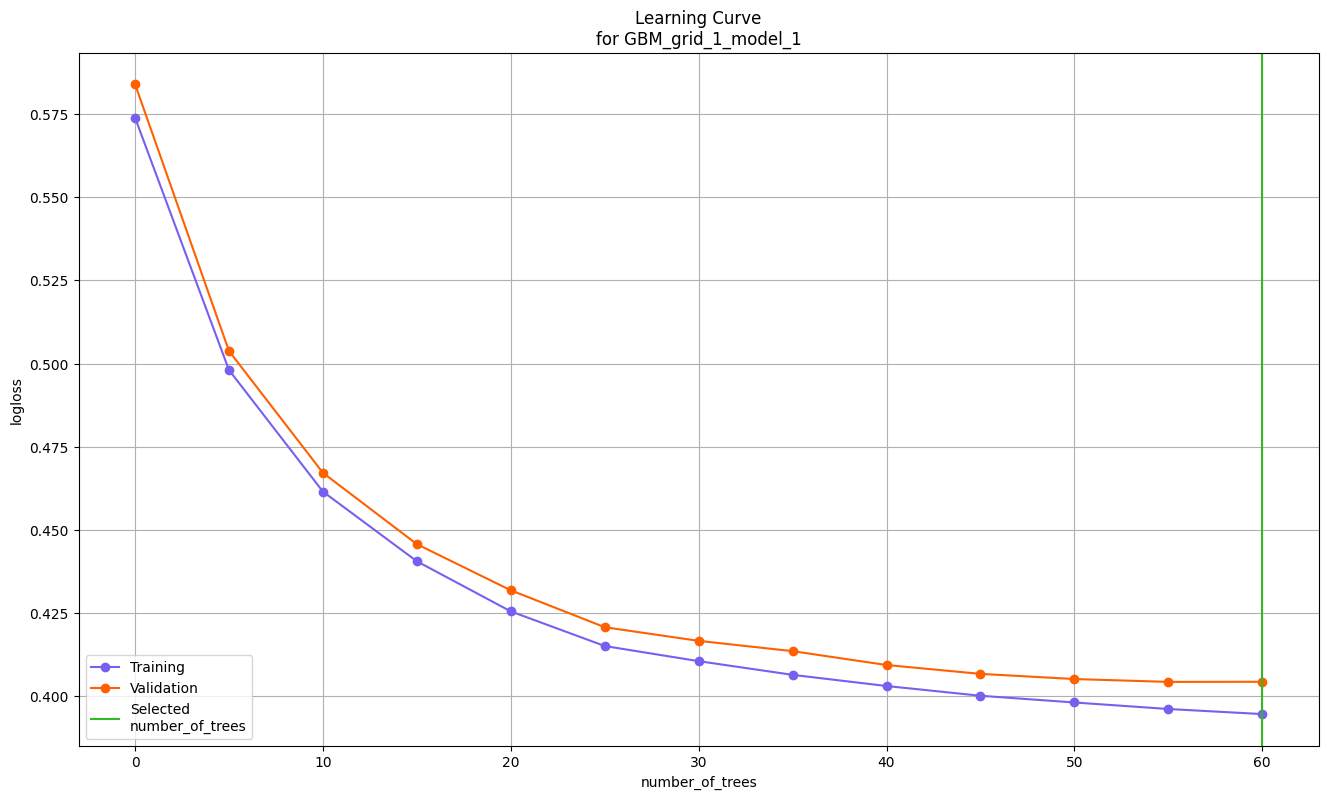

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

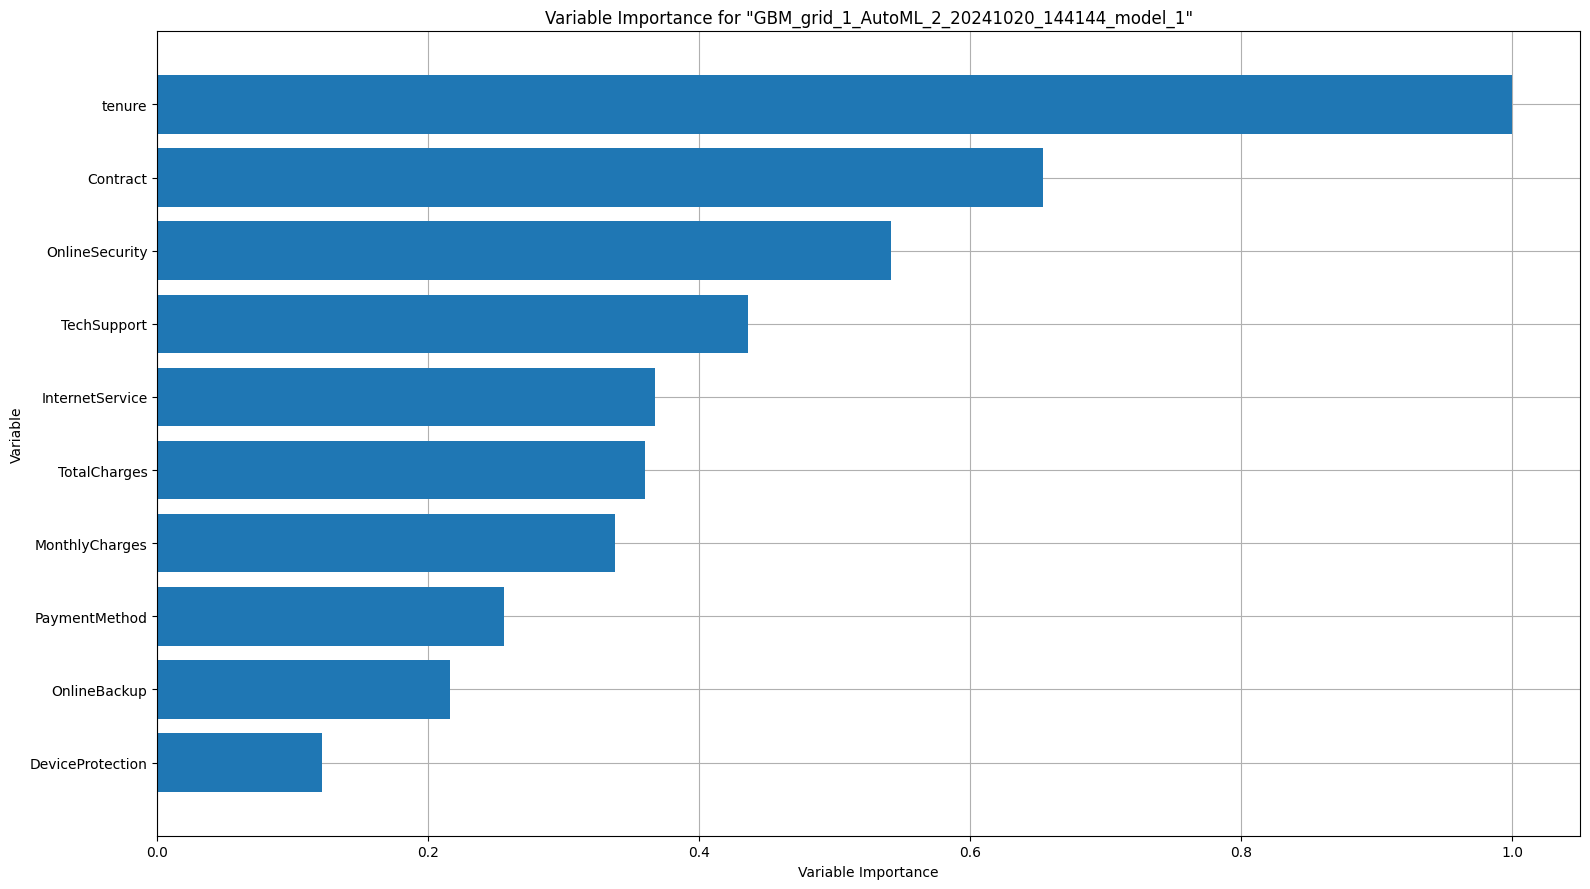

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

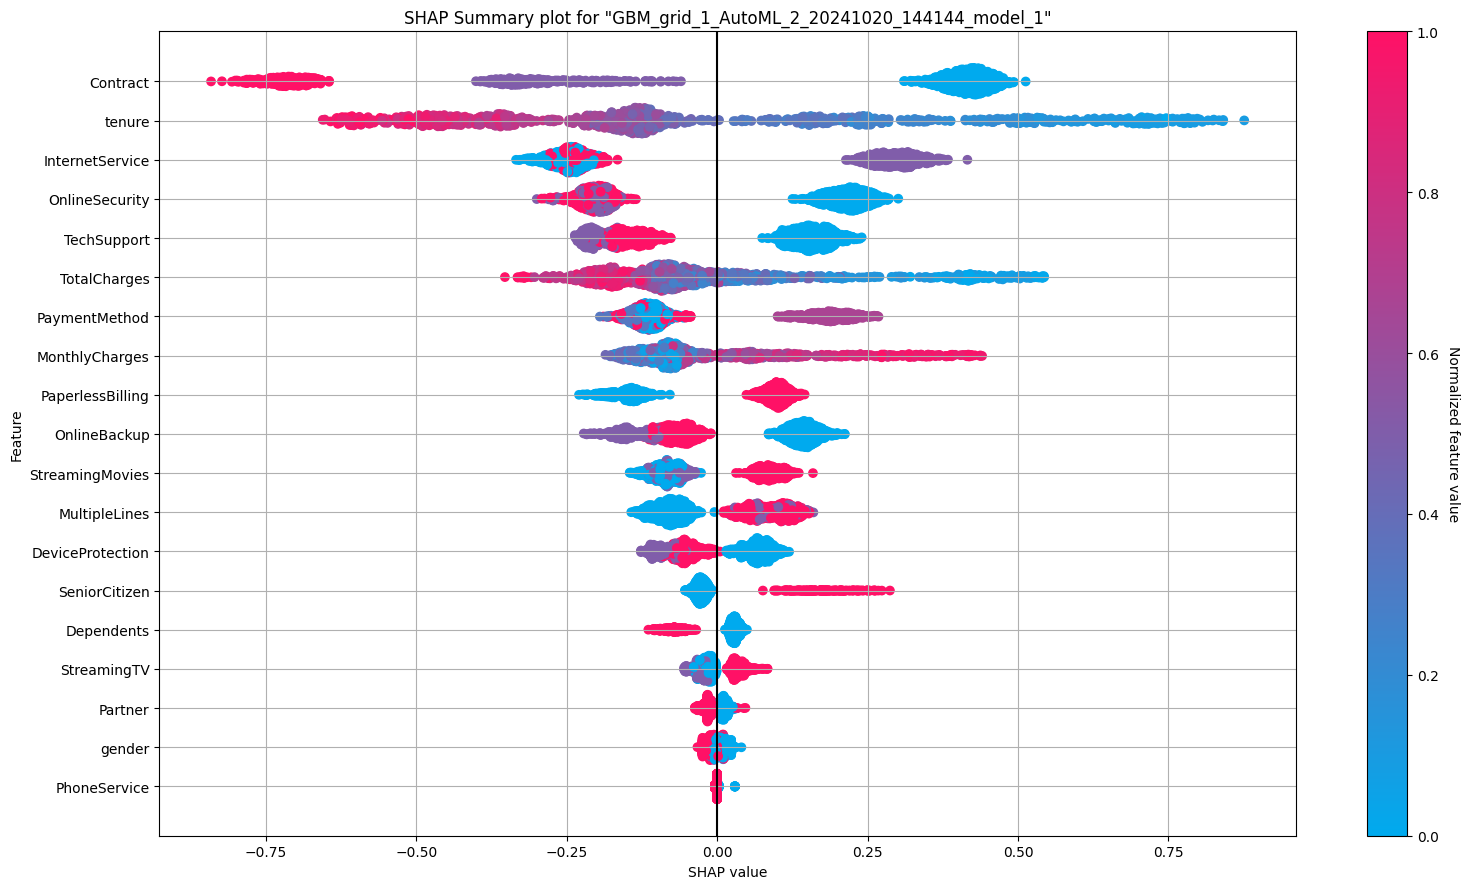

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

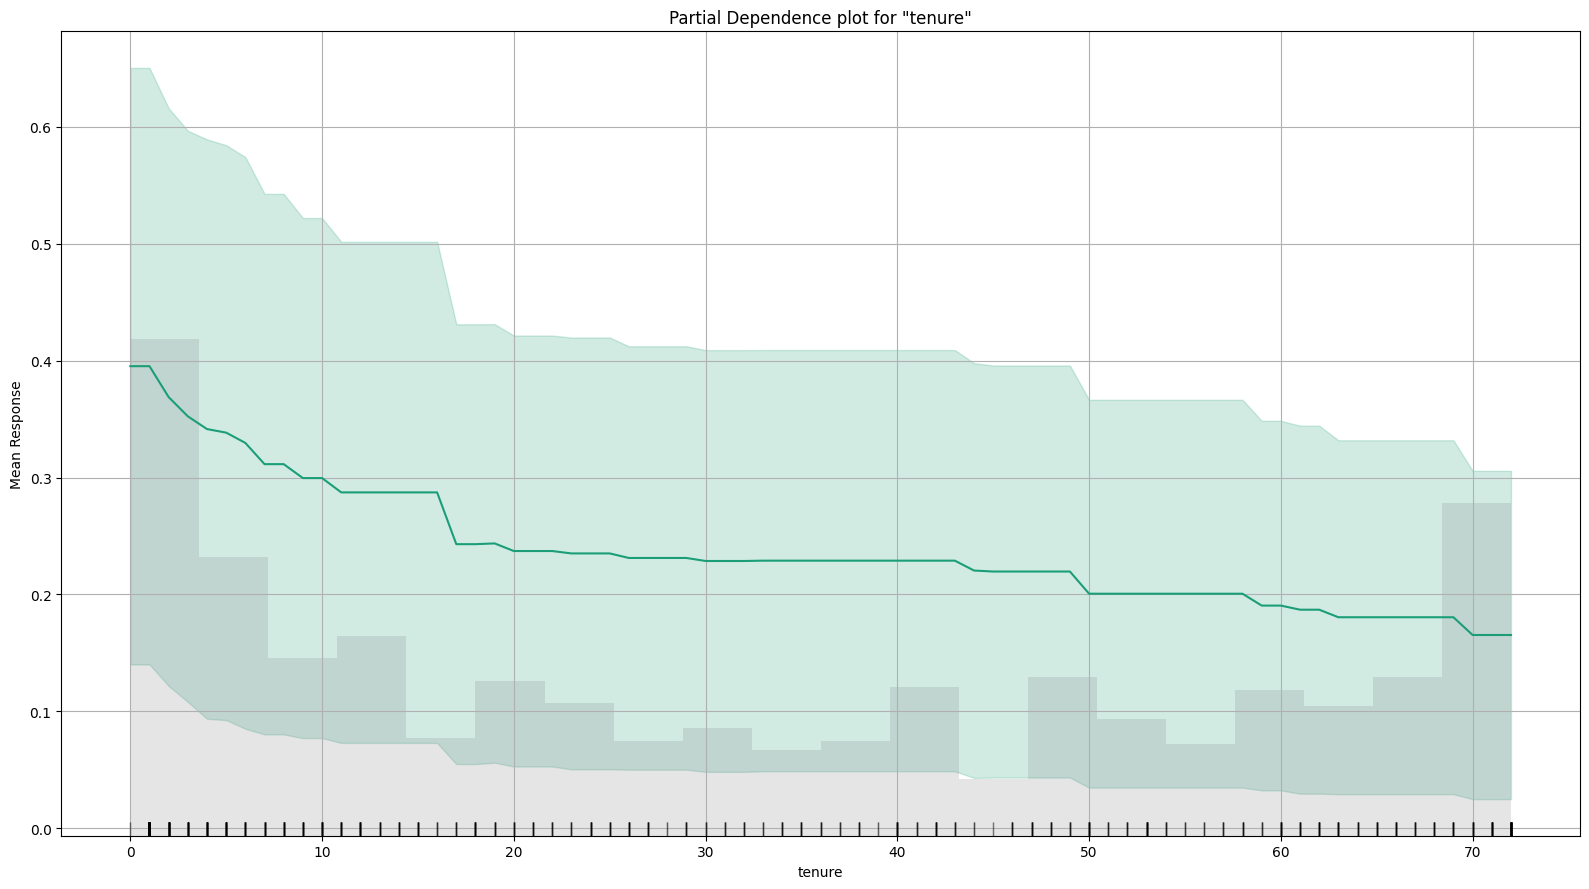

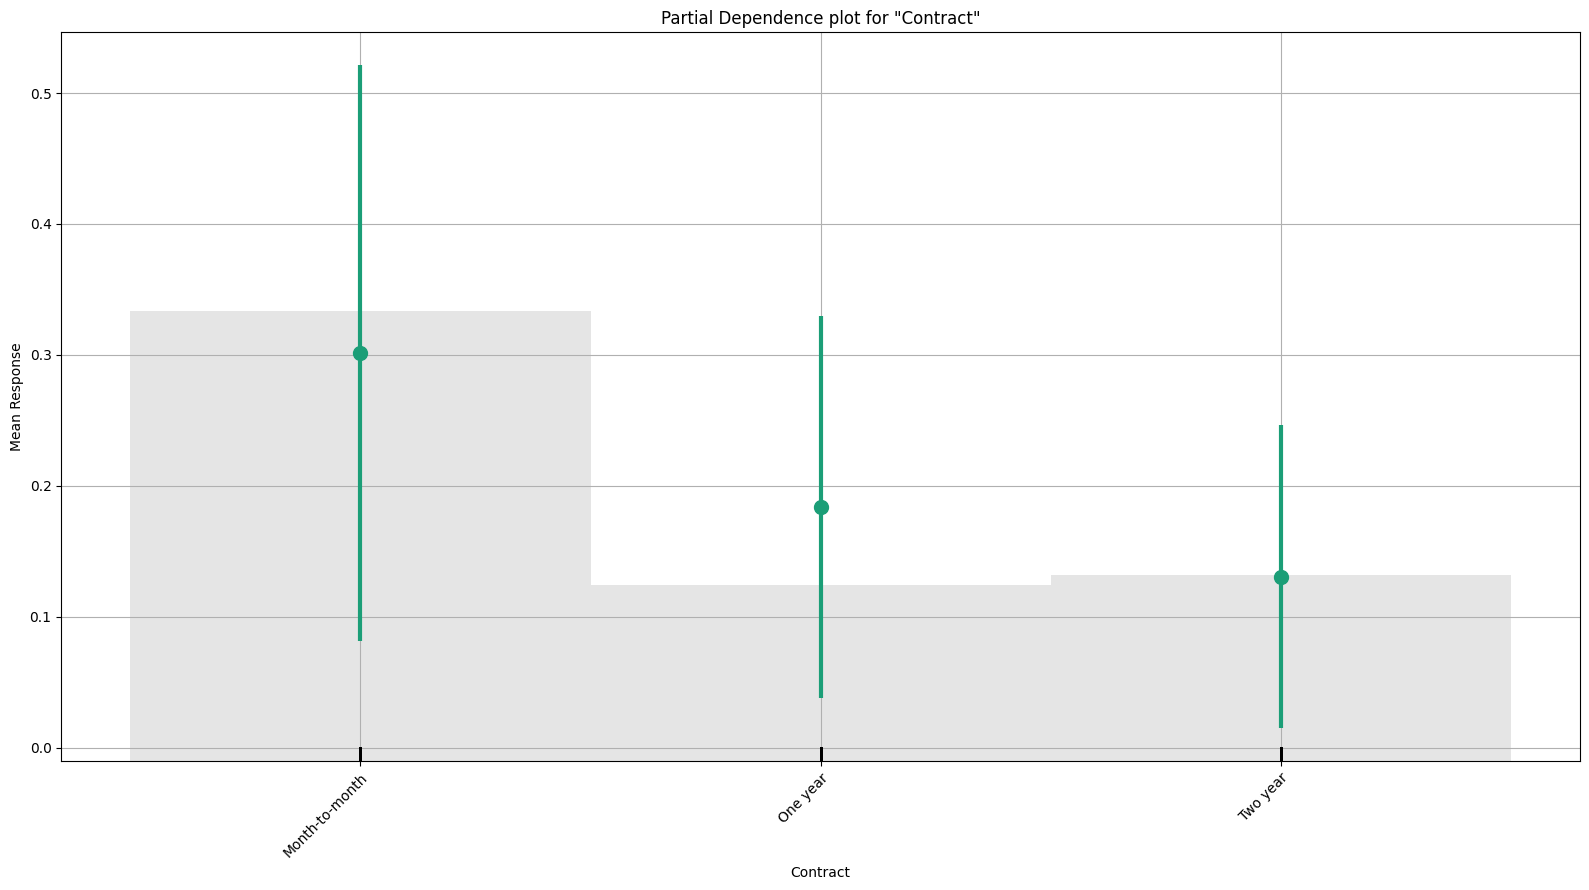

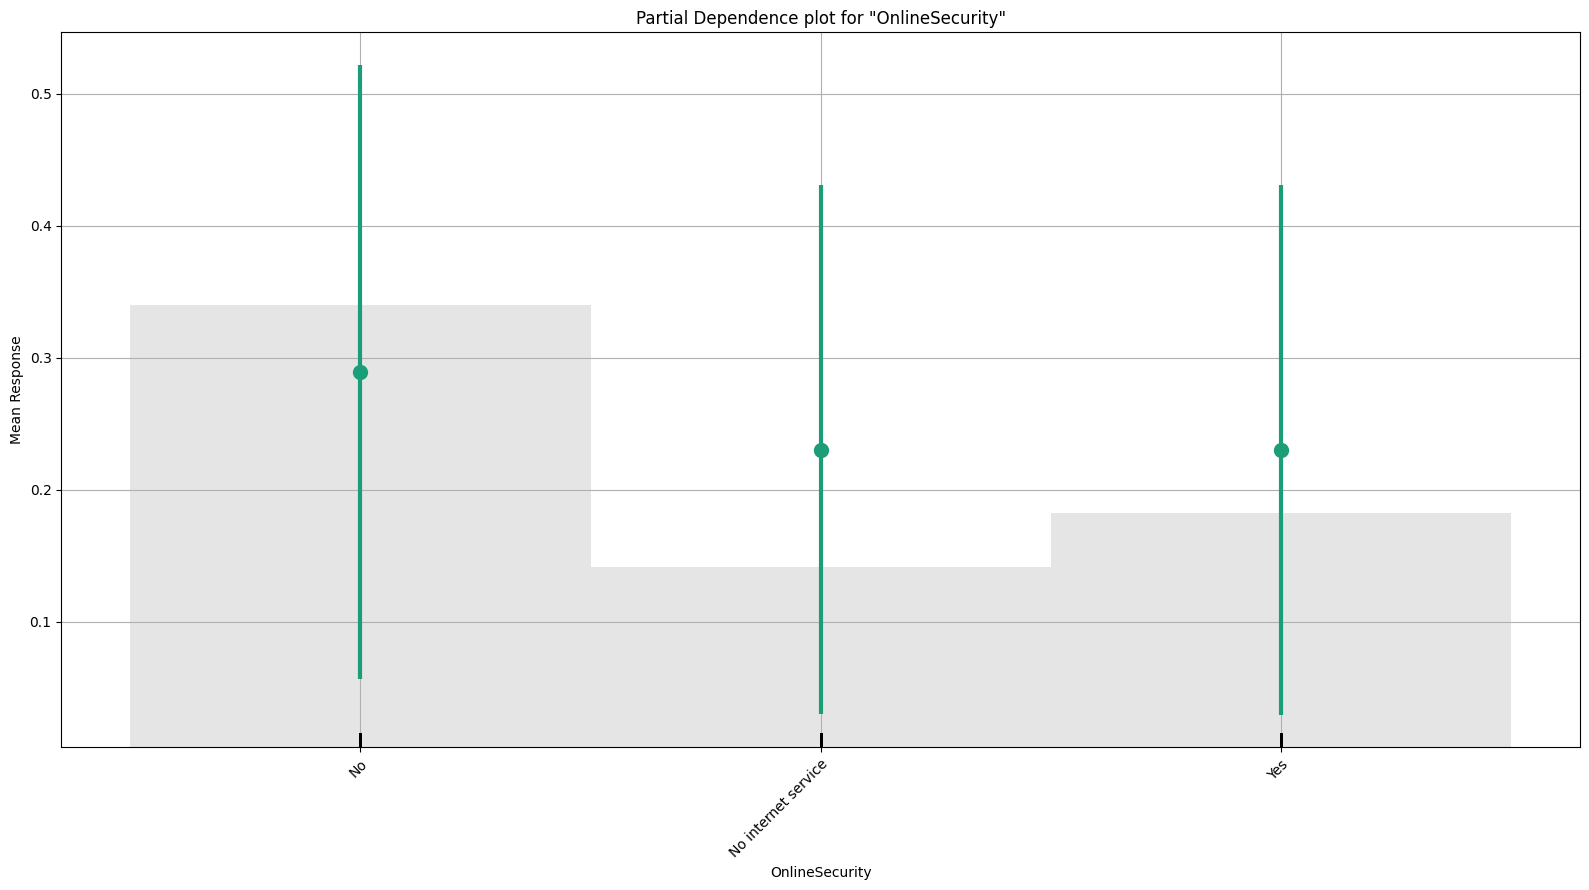

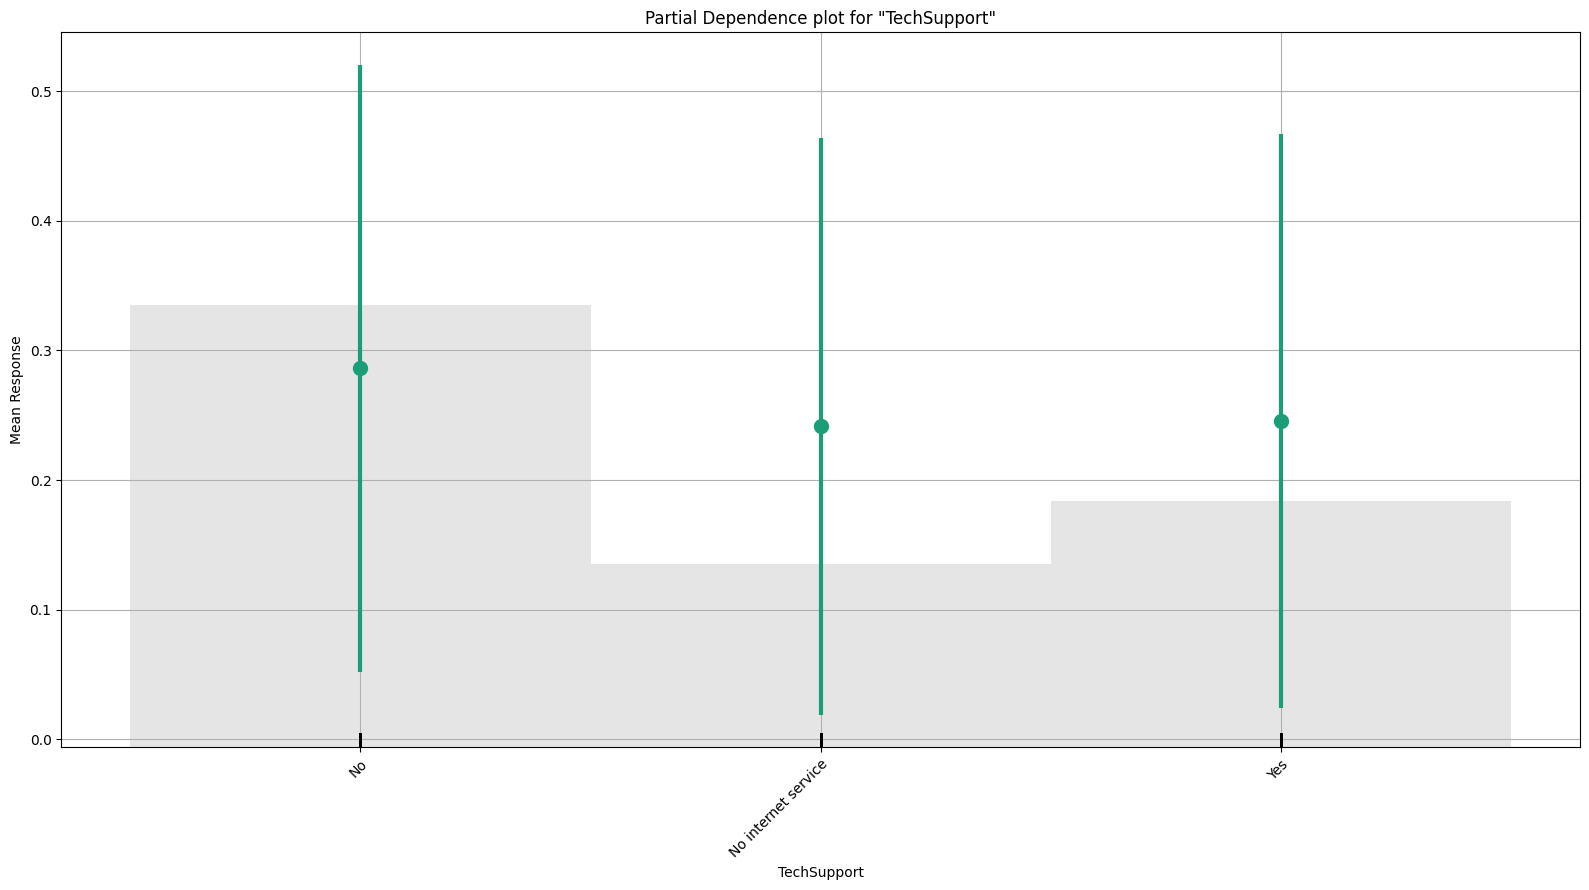

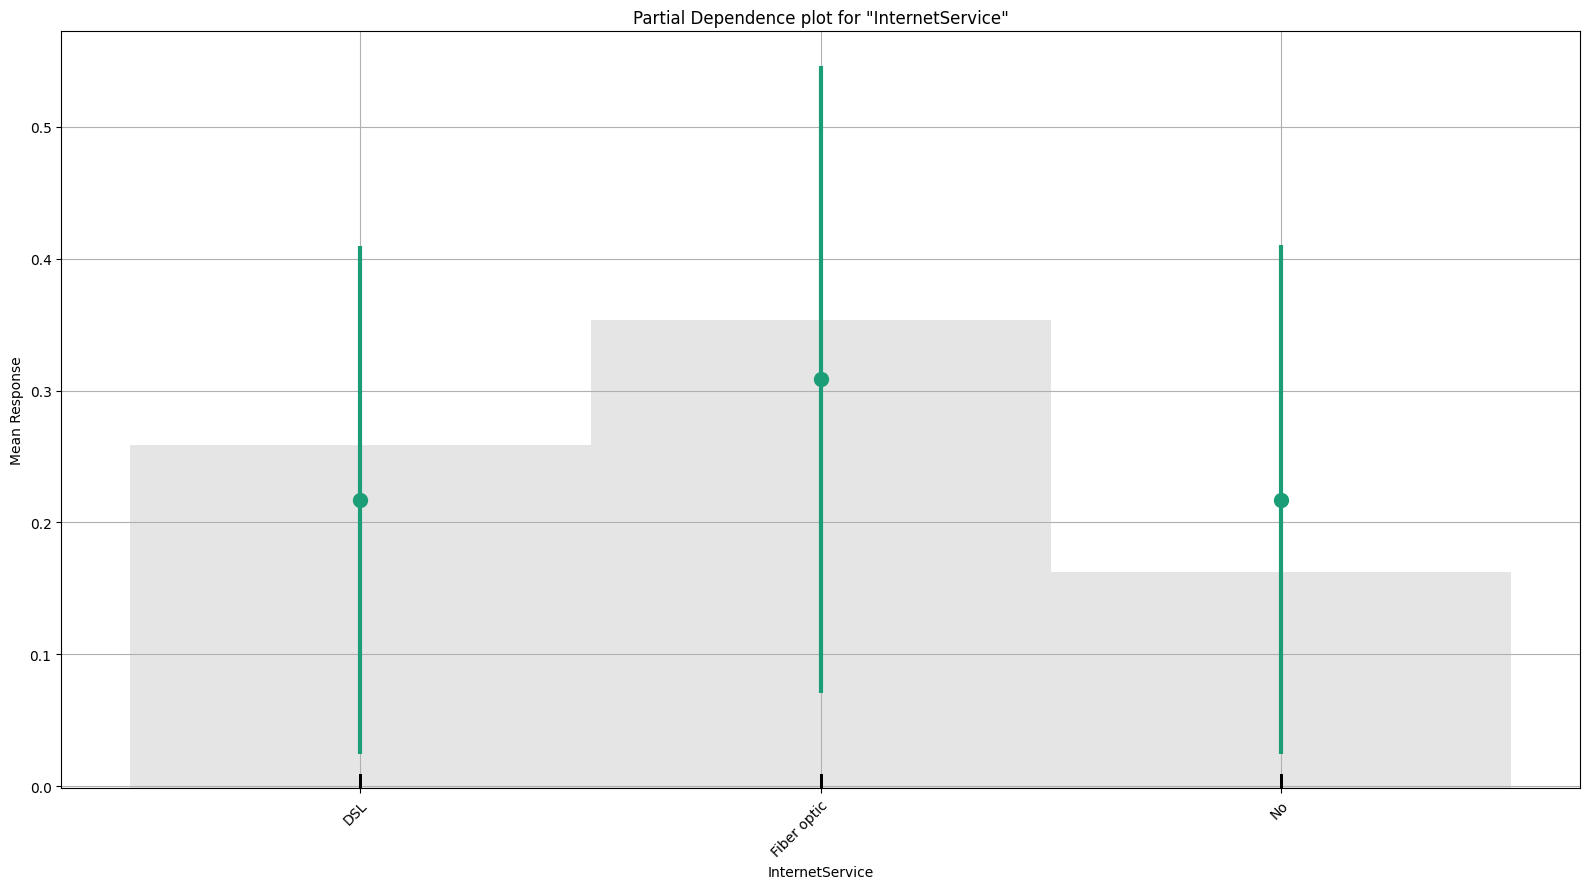

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_grid_1_AutoML_2_20241020_144144_model_1

,No,Yes,Error,Rate
No,632.0,108.0,0.1459,(108.0/740.0)
Yes,93.0,197.0,0.3207,(93.0/290.0)
Total,725.0,305.0,0.1951,(201.0/1030.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

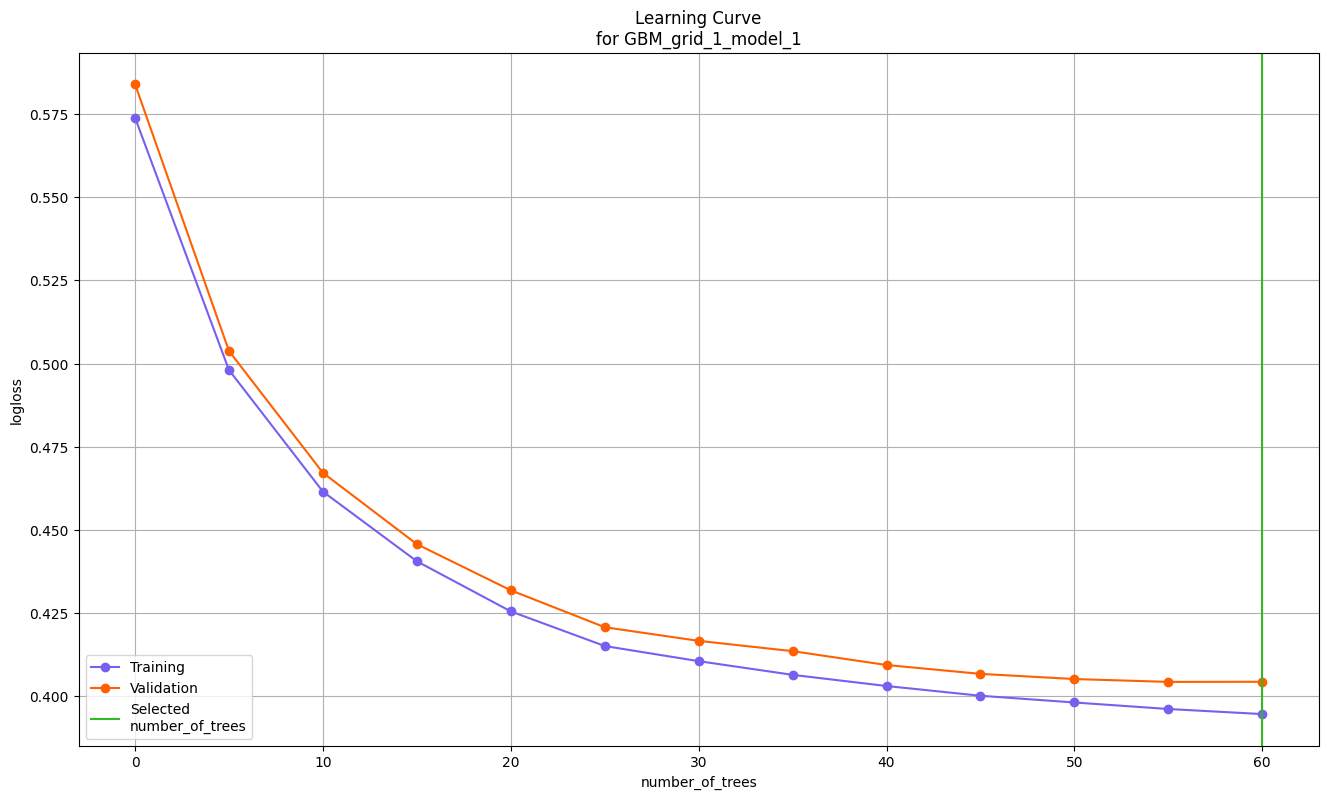

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

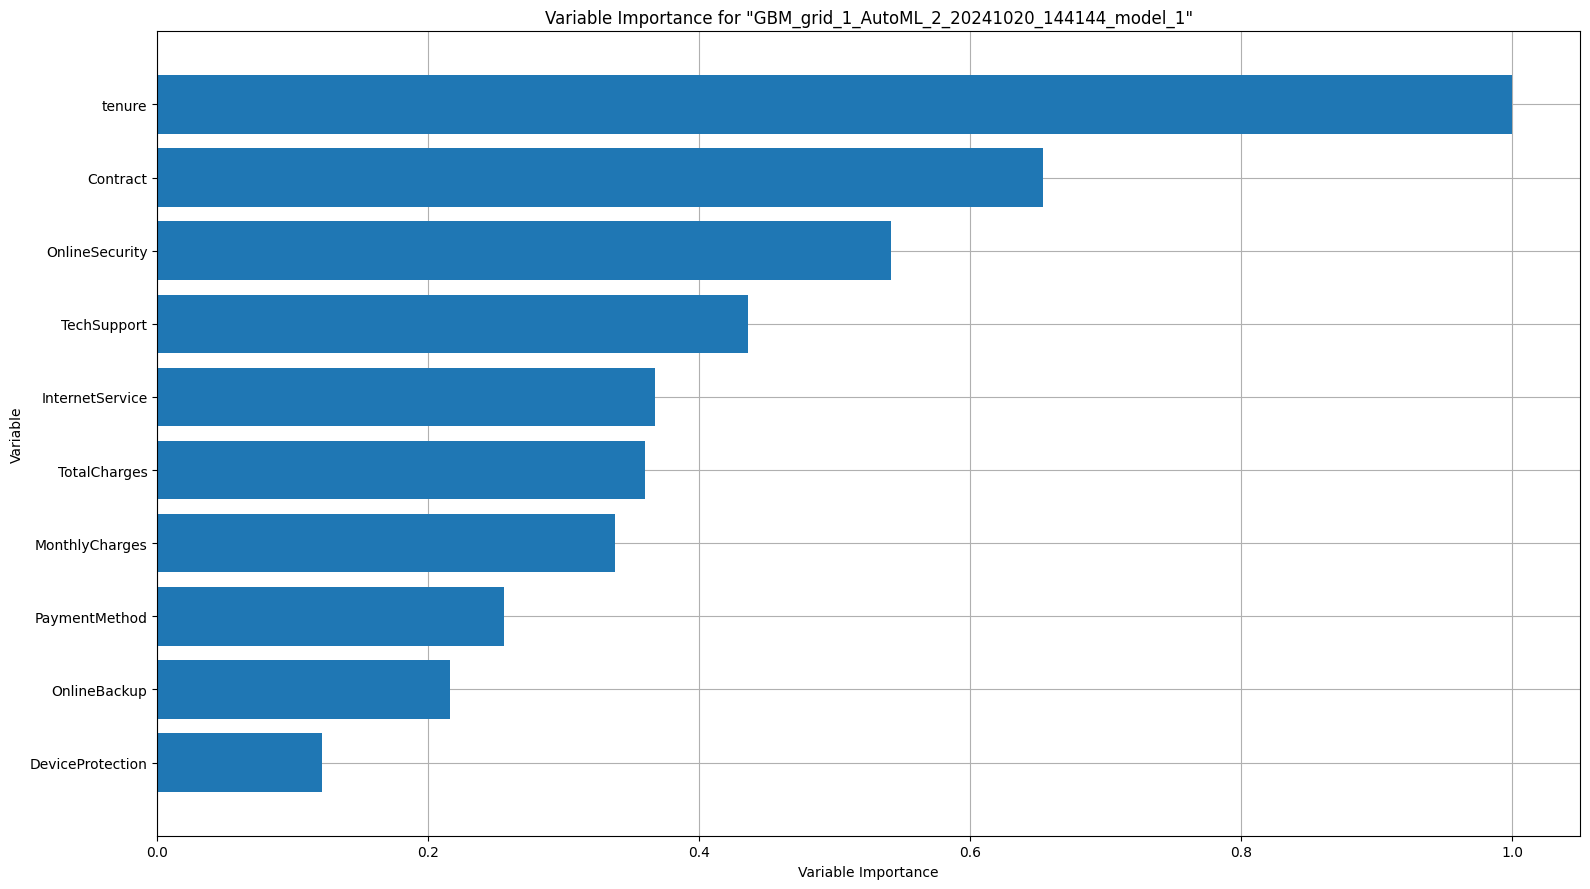

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

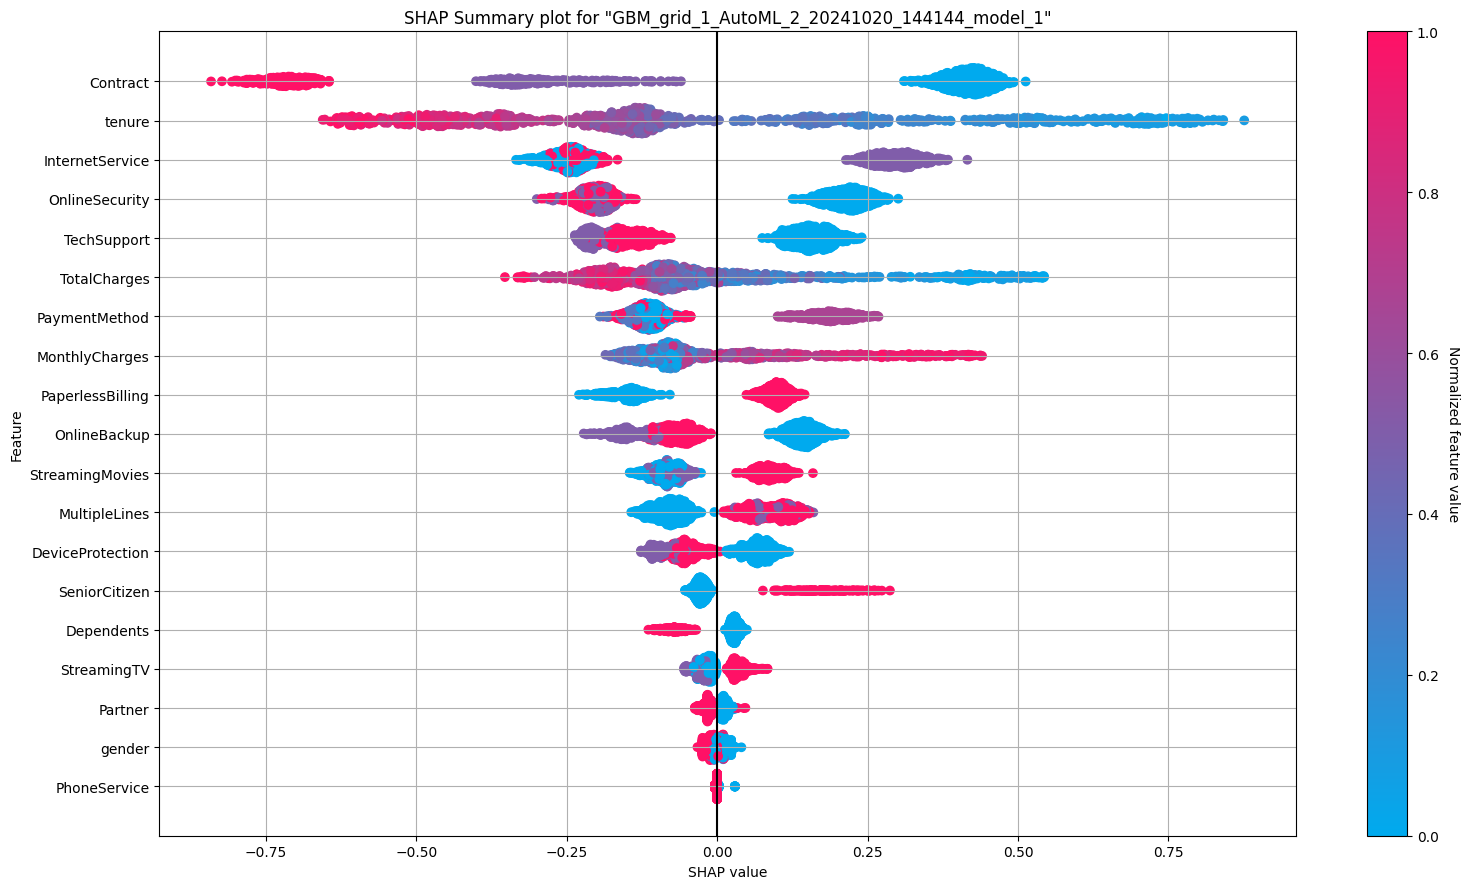

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

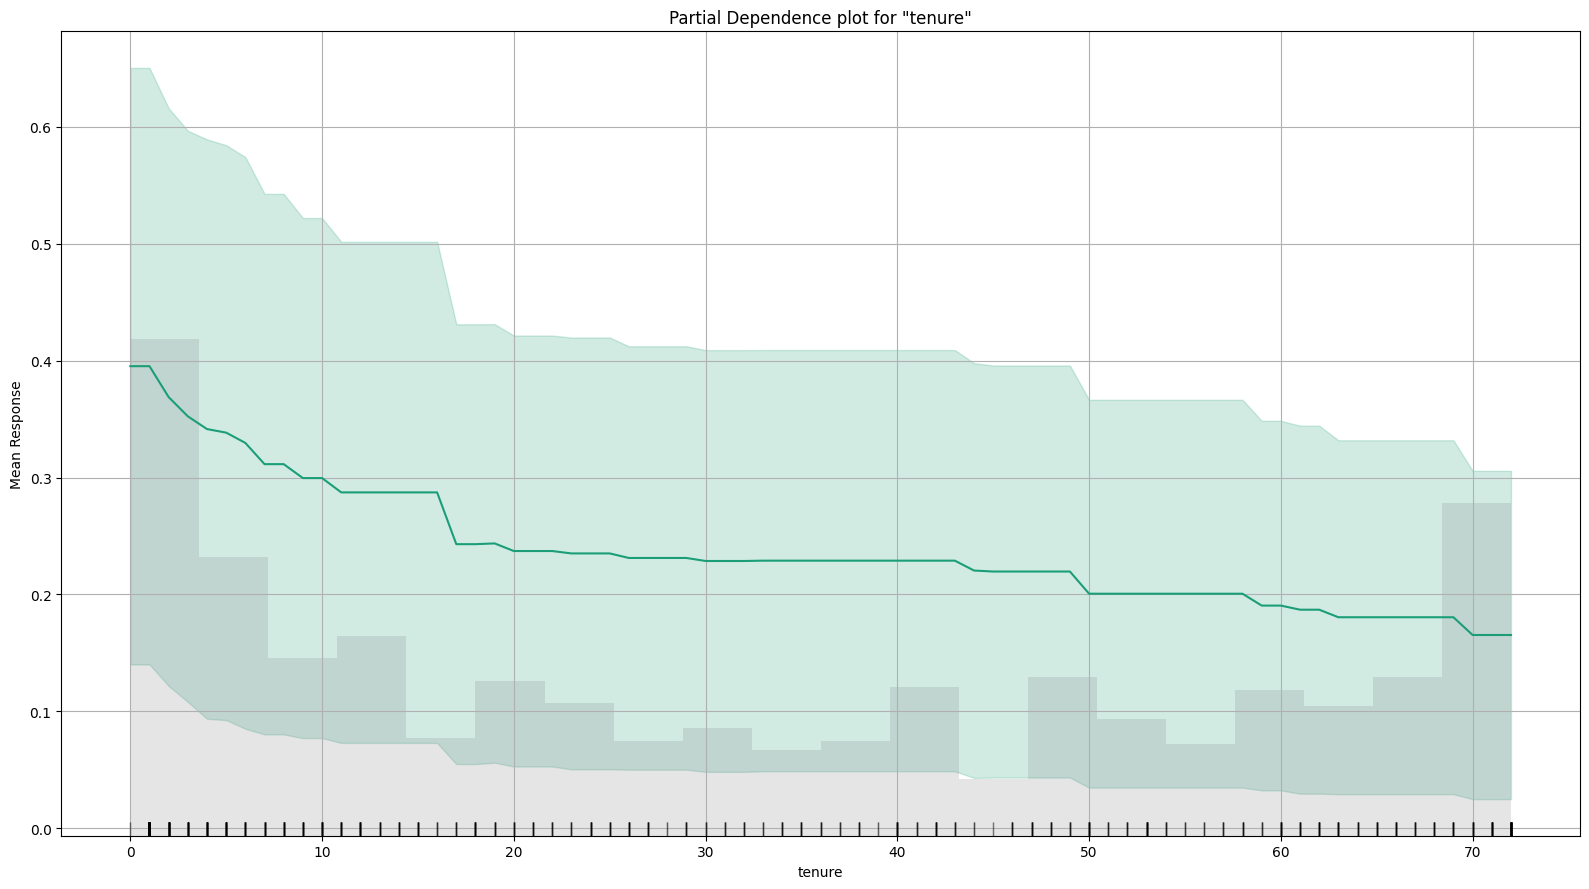

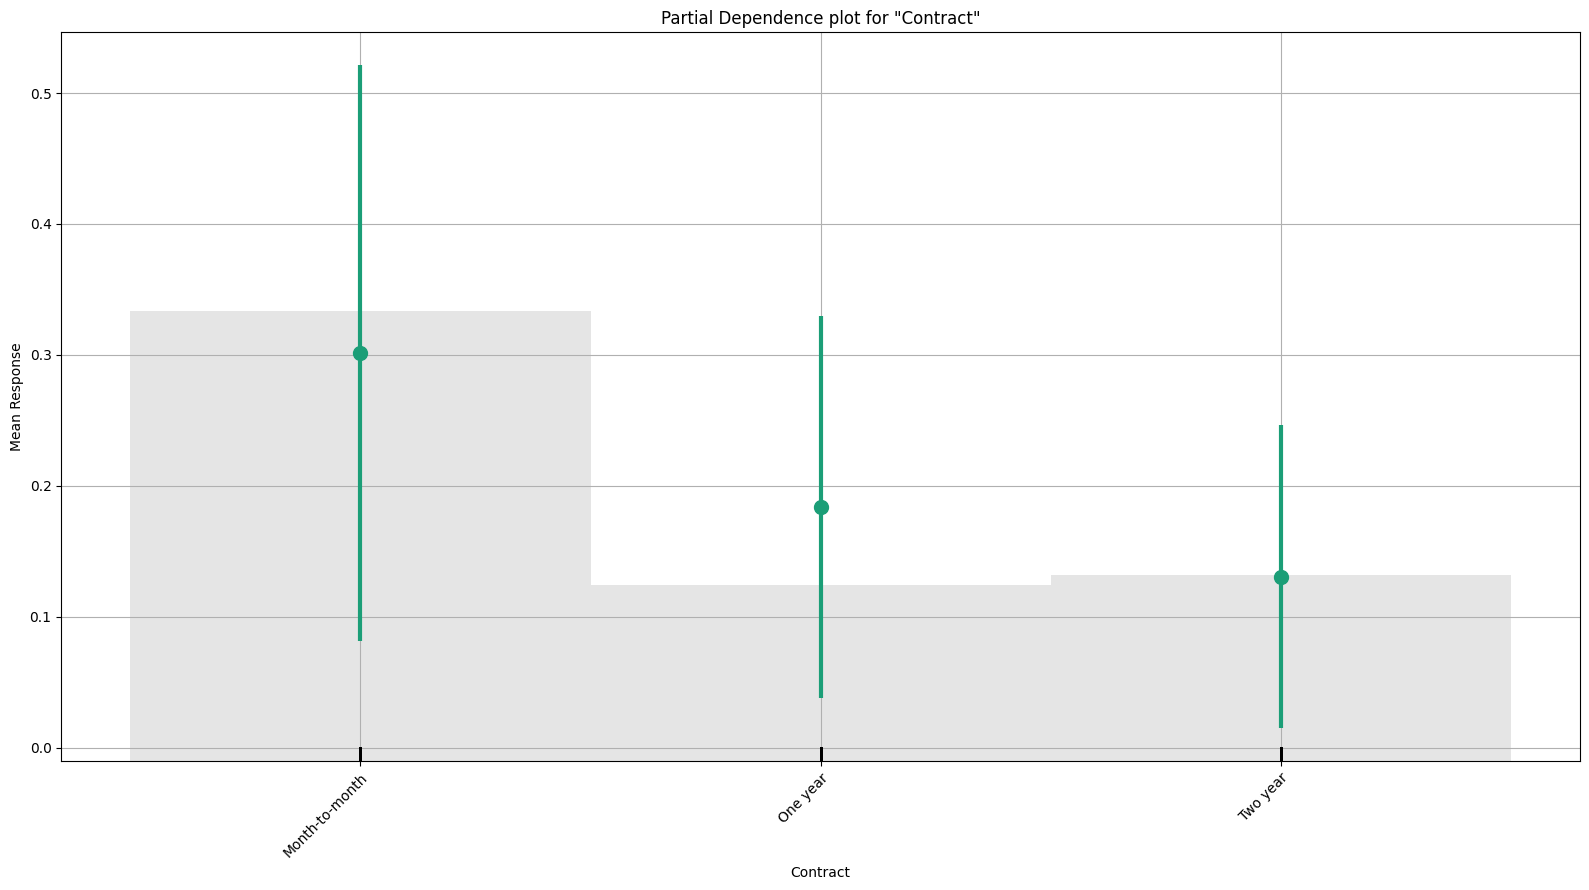

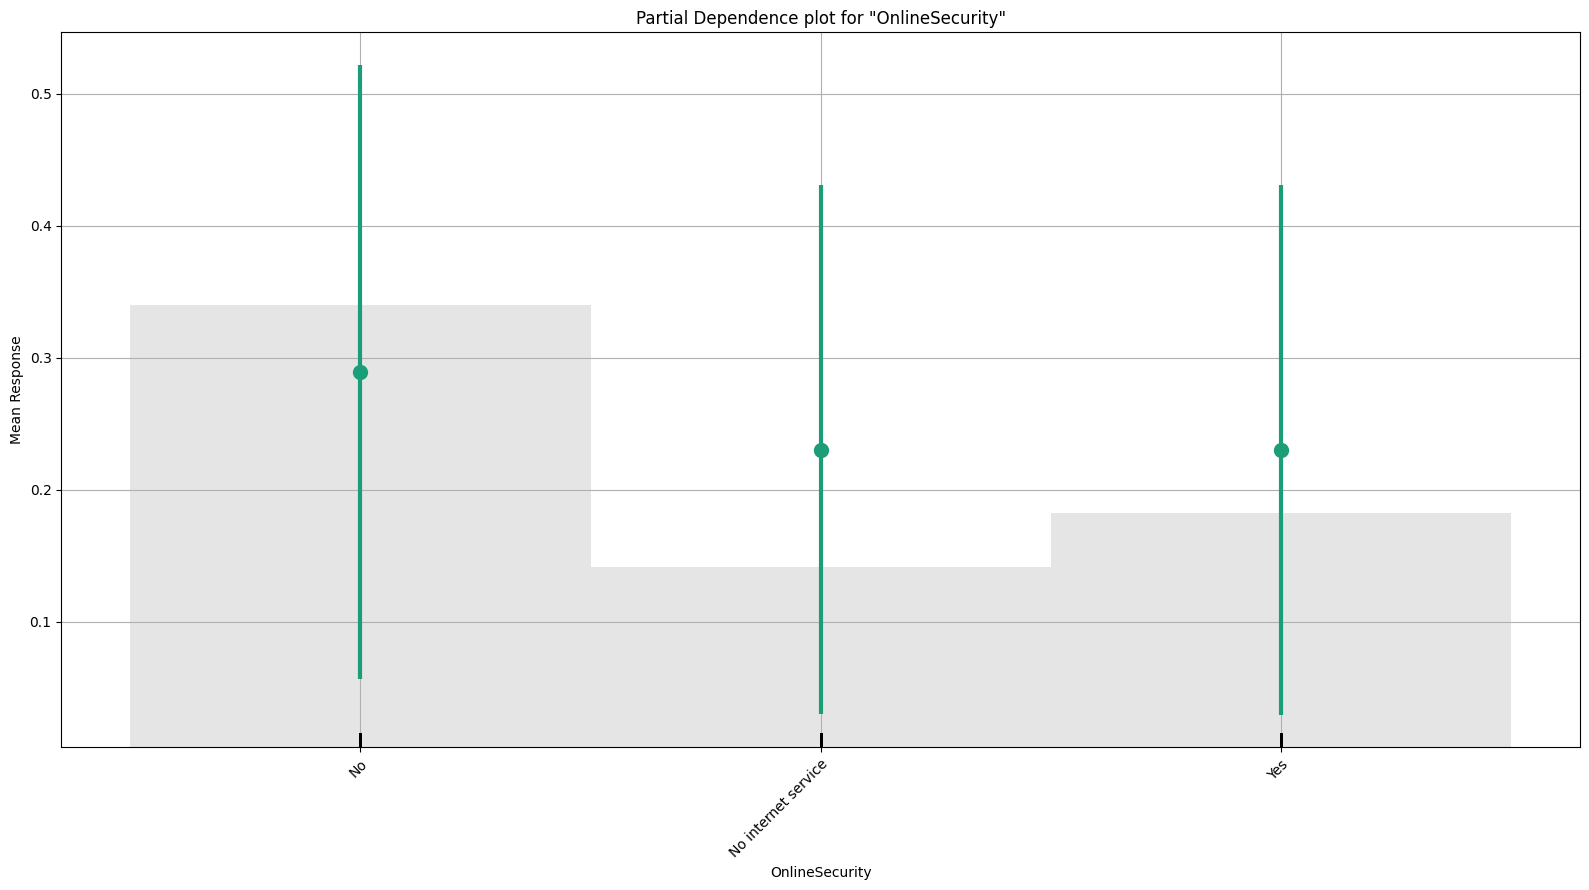

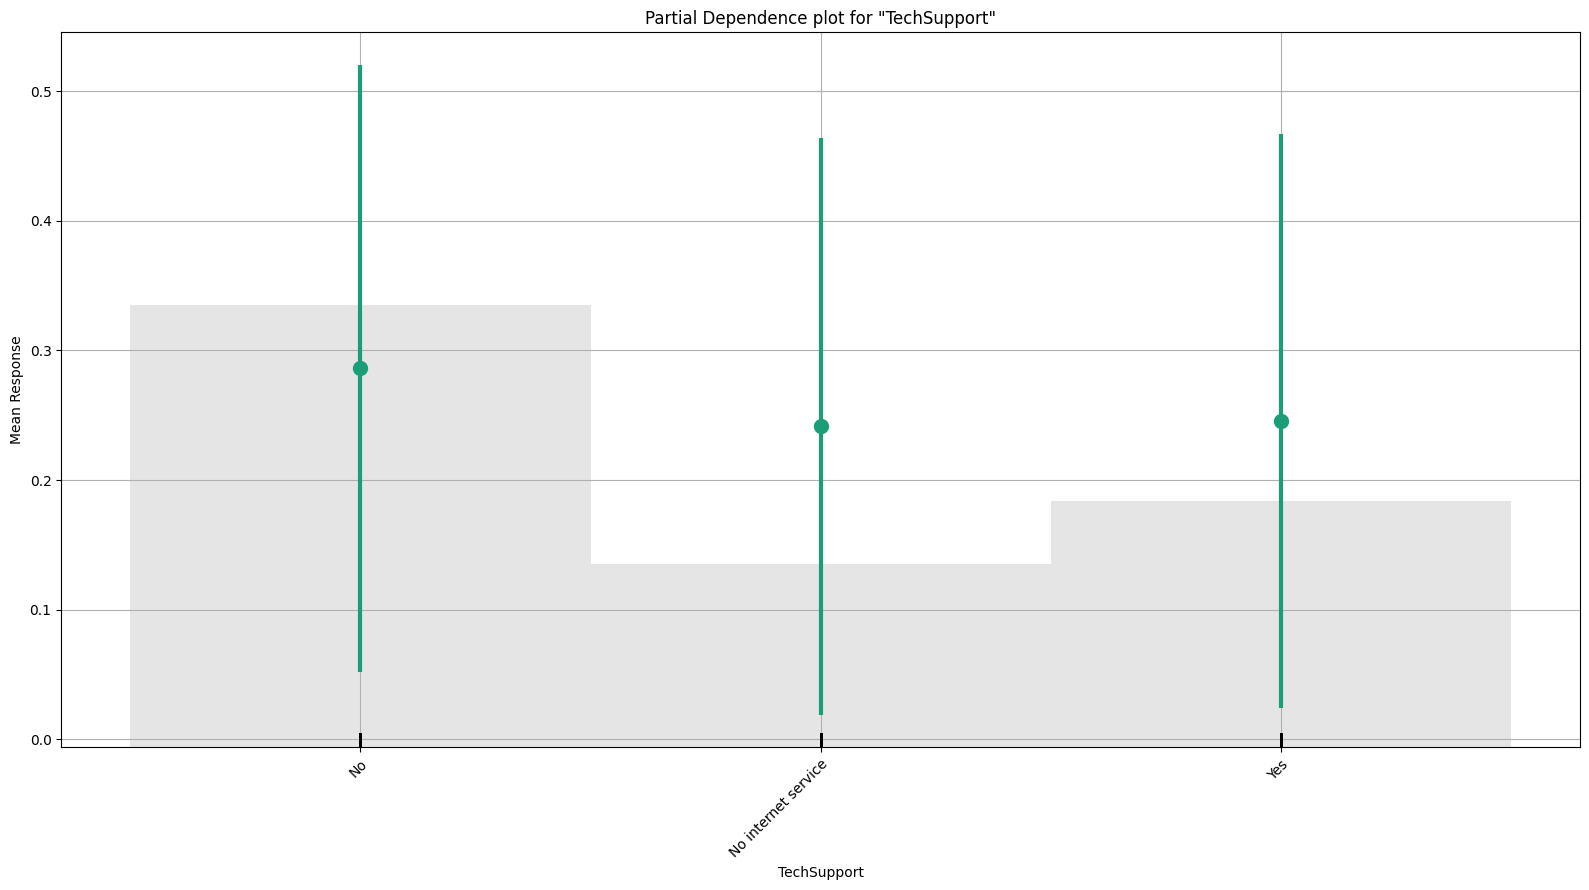

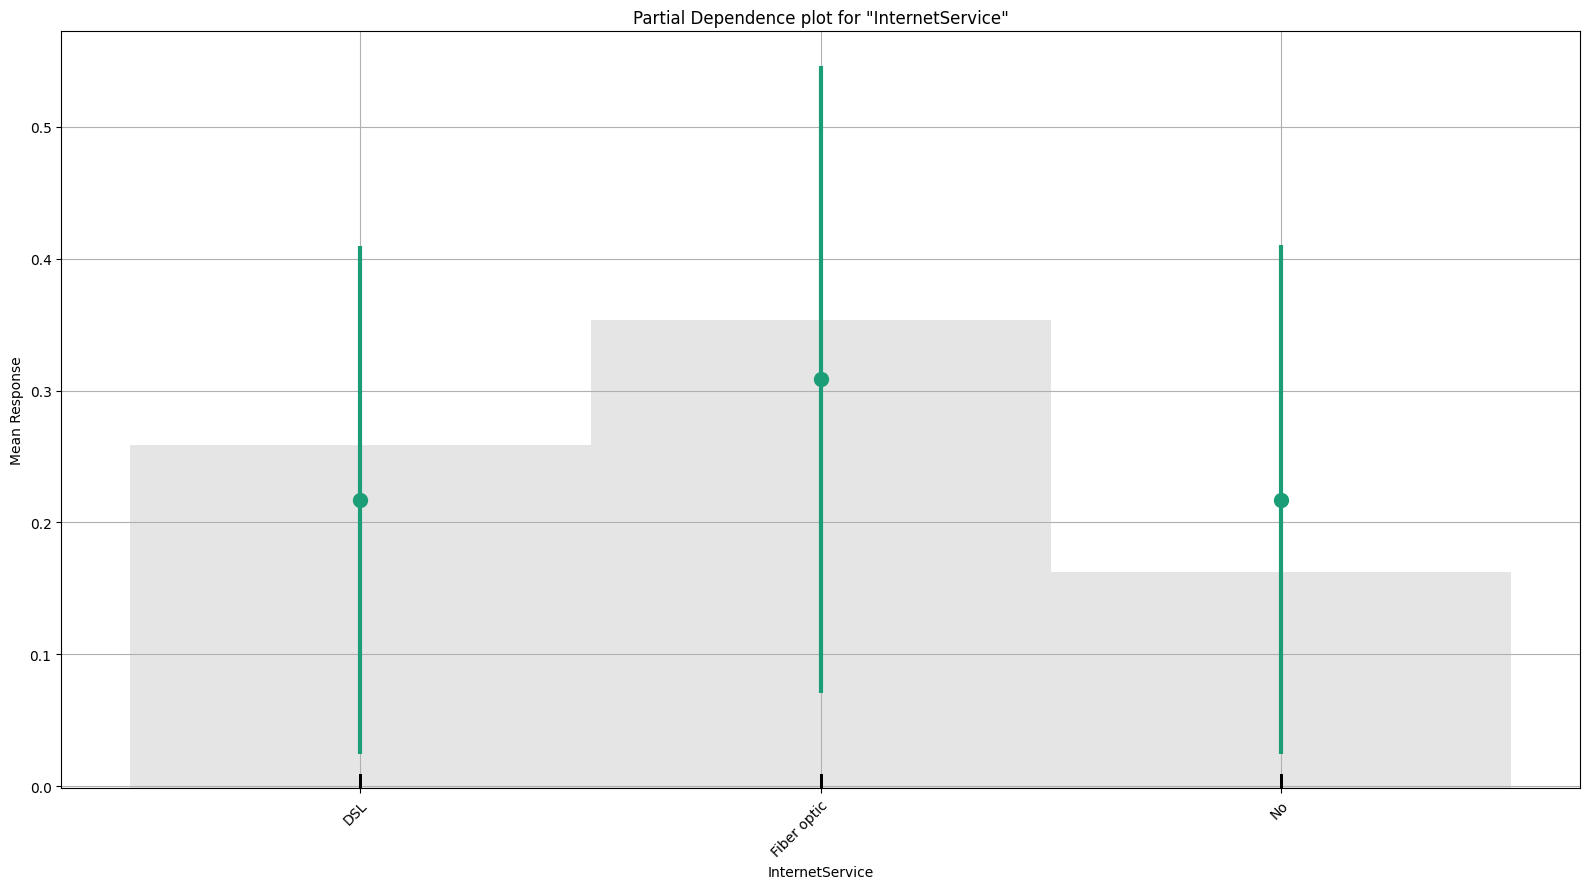

In [51]:
out.explain(churn_test)

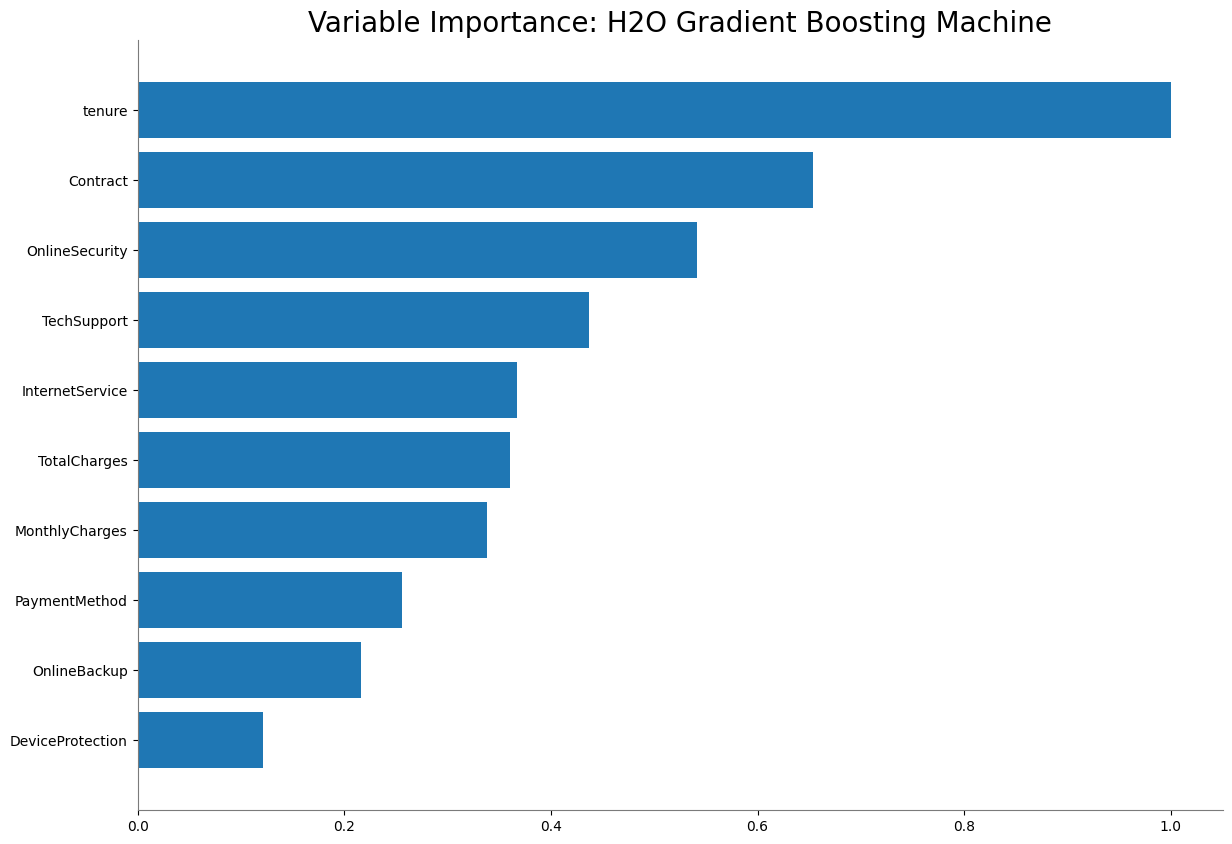

<Figure size 640x480 with 0 Axes>

In [47]:
out.varimp_plot()

In [48]:
h2o.display.toggle_user_tips()
aml.leader

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_2_20241020_144144_model_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    60                 60                          9427                   3            3            3             7             8             7.86667

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.1269429074118101
RMSE: 0.35629048178671585
LogLoss: 0.39454429591886125
Mean Per-Class Error: 0.22084075216325796
AUC: 0.8628913663716449
AUCPR: 0.6912903872785476
Gini: 0.7257827327432897

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3120979893231964
       No    Yes    Error    Rate
-----  ----  -----  -------  ---------------
No     2929  734    0.2004   (734.0/3663.0)
Yes    312   981    0.2413   (312.0/1293.0)
Total  3241  1715   0.2111   (1046.0/4956.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.312098     0.652261  220
max f2                       0.216784     0.755783  269
max f0point5                 0.498858     0.659832  140
max accuracy                 0.498858     0.819411  140
max precision                0.900424     1         0
max recall                   0.0210277    1         394
max specificity              0.900424     1         0
max absolute_mcc             0.381912     0.516646  189
max min_per_class_accuracy   0.288762     0.77887   231
max mean_per_class_accuracy  0.260636     0.784888  245
max tns                      0.900424     3663      0
max fns                      0.900424     1291      0
max fps                      0.0158783    3663      399
max tps                      0.0210277    1293      394
max tnr                      0.900424     1         0
max fnr                      0.900424     0.998453  0
max fpr                      0.0158783    1         399
max tpr                      0.0210277    1         394

Gains/Lift Table: Avg response rate: 26.09 %, avg score: 26.19 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100888                   0.834906           3.29633    3.29633            0.86             0.854879   0.86                        0.854879            0.033256        0.033256                   229.633   229.633            0.031345
2        0.0201776                   0.803646           3.52631    3.41132            0.92             0.819755   0.89                        0.837317            0.0355762       0.0688322                  252.631   241.132            0.0658292
3        0.0300646                   0.779661           3.75472    3.52425            0.979592         0.791375   0.919463                    0.822209            0.037123        0.105955                   275.472   252.425            0.102679
4        0.0401533                   0.753372           3.14302    3.42846            0.82             0.766865   0.894472                    0.808303            0.0317092       0.137664                   214.302   242.846            0.131931
5        0.0500404                   0.730364           3.36361    3.41565            0.877551         0.743068   0.89112

In [49]:
aml.leader.download_mojo(path = "./")

'd:\\GIT HUB\\AutoML\\GBM_grid_1_AutoML_2_20241020_144144_model_1.zip'

In [50]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_grid_1_AutoML_2_20241020_144144_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_grid_1_AutoML_2_20241020_144144_model_1'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_2_20241020_144144_training_py_85_sid_b362',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_2_20241020_144144_training_py_85_sid_b362'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_2_20241020_144144_training_py_85_sid_b362',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_2_20241020_144144_training_py_85_sid_b362'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'F

---

# **`Task-2`**

# Meta-Learning for Autonomous Machine Learning Project - Week 1

## First Week Objective: Building an AutoML System

This project focuses on implementing an AutoML system using H2O.ai for a customer churn prediction task. The goal is to automate the process of selecting the best models and hyperparameters for a given dataset.

## Project Structure

- `extion project-1.ipynb`: Jupyter Notebook containing the code for the AutoML implementation.
- `README.md`: This file, providing a description of the project.

## Dataset

The project utilizes the Telco Customer Churn dataset, sourced from [https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv](https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv). This dataset contains information about customers of a telecommunications company, including various features and a binary target variable indicating whether a customer churned or not.

## AutoML Implementation

The AutoML system is implemented using the H2O.ai library in Python. The following steps outline the workflow:

1. **Environment Setup:**
   - Ensure you have Java JDK installed.
   - Install the `h2o` library using `pip install h2o`.

2. **Data Loading and Preparation:**
   - Import the necessary libraries, including `h2o` and `H2OAutoML`.
   - Load the Telco Customer Churn dataset using `h2o.import_file()`.
   - Split the data into training, validation, and test sets using `split_frame()`.
   - Define the target variable (`Churn`) and features (all columns except `Churn` and `customerID`).

3. **AutoML Configuration and Training:**
   - Create an `H2OAutoML` object, specifying parameters such as:
     - `max_models`: Maximum number of models to build.
     - `seed`: Random seed for reproducibility.
     - `exclude_algos`: Algorithms to exclude from the search (e.g., "StackedEnsemble", "DeepLearning").
     - `verbosity`: Level of logging information.
     - `nfolds`: Number of cross-validation folds (set to 0 to disable).
   - Train the AutoML model using the training data and specified configuration.

4. **Model Selection and Evaluation:**
   - Retrieve the best-performing model from the AutoML leaderboard using `get_model()` ***[GBM is the best model]***.
   - Evaluate the model's performance on the test data using appropriate metrics (e.g., AUC, accuracy).
   - 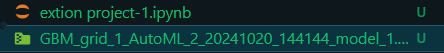  .Best model will save into the local environment.

## Results

The AutoML system automatically identifies the best-performing model and hyperparameters for the customer churn prediction task. The Jupyter Notebook provides detailed logs and results of the AutoML process, including the performance of different models and the selected best model.

